# Check spike by cell

author: steeve.laquitaine@epfl.ch


* `534` near-contact cells
* `472` pyramidal cells


In [11]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os 
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from time import time
import pandas as pd
import spikeinterface.extractors as se

from spikeinterface.comparison import GroundTruthStudy
import shutil 

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
os.chdir(PROJ_PATH)
from src.nodes.prepro import preprocess
from src.nodes.postpro import waveform
from src.nodes.utils import get_config, write_metadata
from src.nodes.truth.silico import ground_truth
from src.nodes.io.silico.loading import load_campaign_params
from src.nodes.dataeng.silico import probe_wiring

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"    # specifies the experiment 
SIMULATION_DATE = "2023_02_19" # specifies the run (date)
MS_BEFORE = 3       # ms
MS_AFTER = 3        # ms
# CELL_ID = 4229506   # the most active near-probe pyramidal cell
CELL_ID = 19690   
CHANNEL_IDS = np.arange(64,80).tolist()   # plot traces from channels nearest to filtered neuron group
CREATE = False # recreate waveform extractor

# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# SETUP PATH
SPIKE_FILE_PATH = data_conf["dataeng"]["campaign"]["output"]["spike_file_path"]
RAW_LFP_TRACE_FILE_PATH = data_conf["dataeng"]["campaign"]["output"]["trace_file_path"]
CELL_TRACE_FILE_PATH = data_conf["dataeng"]["campaign"]["output"]["unit_trace_path"]+"cell_3754013_trace.pkl"


# SET WAVEFORM FOLDER
STUDY_FOLDER = data_conf["postprocessing"]["waveform"]["study"]
WAVEFORM_FOLDER = data_conf["postprocessing"]["waveform"]["WaveformExtractor"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-05-08 15:36:16,958 - root - utils.py - get_config - INFO - Reading experiment config.
2023-05-08 15:36:16,985 - root - utils.py - get_config - INFO - Reading experiment config. - done


1. We load preprocessed recording
2. We load spikes and filter input cell spikes
2. We extract the spike within -3 to 3 ms centered on the spike timestamps
3. We plot the spike-triggered average of each contact

In [7]:
# # TODO:
# # - make a function and add to node.postpro waveform.py

# experiment = EXPERIMENT
# simulation_date = SIMULATION_DATE
# lfp_trace_file = RAW_LFP_TRACE_FILE_PATH
# spike_file = SPIKE_FILE_PATH
# study_folder = STUDY_FOLDER
# ms_before = MS_BEFORE
# ms_after = MS_AFTER

# """Run spike waveform extraction

# TODO:
# - add a cell_id argument to filter by cell_ids

# Args:
#     experiment (str):
#     simulation_date (str): _description_
#     lfp_trace_file (str): _description_
#     spike_file (str): _description_
#     cell_id (int): _description_
#     study_folder (str): _description_
#     ms_before (float): _description_
#     ms_after (float): _description_

# Returns:
#     _type_: _description_
# """

# # load parameters
# t0 = time()
# data_conf, param_conf = get_config(experiment, simulation_date).values()
# simulation = load_campaign_params(data_conf)
# print("set parameters in ", time() - t0, "sec")

# # load data
# t0 = time()
# lfp_trace = pd.read_pickle(lfp_trace_file)
# spike_ms = pd.read_pickle(spike_file)
# spike_ms = spike_ms[spike_ms.values==CELL_ID]
# print("load recording and input cell spikes in ", time() - t0, "sec")


# # Find location indices of the spike time indices nearest to
# # the trace time indices
# t0 = time()
# spike_loc = []
# for spike_ms_i in spike_ms.index:
#     spike_loc.append(np.abs(lfp_trace.index - spike_ms_i).argmin())
# print("Converted spike to timepoint location in ", time() - t0, "sec")

# # map spikes with units in SI's SortingObject (fast)
# t0 = time()
# times = np.array(spike_loc)
# labels = spike_ms.values
# SortingObject = se.NumpySorting.from_times_labels(
#     [times], [labels], simulation["lfp_sampling_freq"]
# )
# print(
#     "find spike loc for trace sampfreq in ",
#     time() - t0,
#     "sec",
# )

# # load preprocessed recording (fast, 312 spikes)
# t0 = time()
# lfp_recording = preprocess.load(data_conf)
# print("Load preprocessed recording ", time() - t0, "sec")

# if CREATE:
    
#     # create study (12 s)
#     t0 = time()
#     gt_dict = {
#         "rec0": (lfp_recording, SortingObject),
#     }
#     shutil.rmtree(study_folder, ignore_errors=True)
#     study = GroundTruthStudy.create(study_folder, gt_dict)
#     print("Created study in ", time() - t0, "sec")

#     # compute waveforms (0.21 secs, 312 spikes)
#     # - this creates and write waveforms on disk in study/waveforms/
#     # - note: for a single cell, no gain from multiprocessing 
#     # - 100 jobs is slow 
#     t0 = time()
#     study.compute_waveforms(
#         lfp_recording, 
#         ms_before=ms_before, 
#         ms_after=ms_after, 
#         n_jobs=-1, 
#         total_memory='1G',
#         )
#     print("Computed waveforms in ", time() - t0, "sec")

#     # create waveform extractor from saved folder
#     t0 = time()
#     WaveformExtractor = study.get_waveform_extractor(lfp_recording)
#     print("Created WaveformExtractor in ", time() - t0, "sec")
# else:
#     # simply load existing extractor
#     # study = GroundTruthStudy(study_folder)
#     # WaveformExtractor = study.get_waveform_extractor(lfp_recording)
#     lfp_recording = preprocess.load(data_conf)
#     WaveformExtractor = waveform.load(lfp_recording, study_folder=STUDY_FOLDER)

In [12]:
# plot
lfp_recording = preprocess.load(data_conf)
WaveformExtractor = waveform.load(lfp_recording, study_folder=STUDY_FOLDER, ms_before=MS_BEFORE, ms_after=MS_AFTER)
fig = waveform.plot(WaveformExtractor = WaveformExtractor, cell_id = CELL_ID)

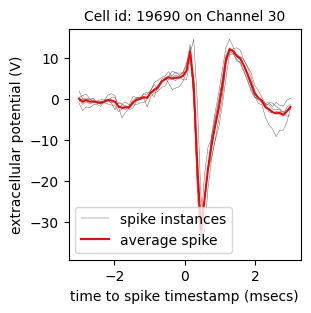

In [10]:
fig

In [22]:
print("spike count:", WaveformExtractor.sorting.get_total_num_spikes()[CELL_ID])

spike count: 5
